# YOLOv2

### 특징
- Better : 정확도 향상
- Faster : 속도 향상
- Stronger : 더 많은 클래스 예측(80->9000)

##### Better
- Batch Normalization : mAP 2% 향상
- High Resolution Classifier : mAP 4% 향상
  - 224x224 -> 448x448로 학습
- Convolution with anchor boxes : mAP 5% 향상
  - Fully Connected Layer 제거: 속도를 느리게 하는 원인
  - YOLOv1에서 bounding box의 좌표값을 랜덤 초기화해서 사용했지만 YOLOv2는 anchor box를 도입
  - K-means cluster on COCO dataests -> 5개의 anchor box
  - 좌표값 대신 offset 예측하는 방식으로 단순하고 학습하기 쉬움
- Fine-grained features
  - 크기가 작은 Feature Map은 Low Level 정보가 부족하므로 Early feature map을 Late Feauture map에 합쳐주는 passthrough layer도입
  - 26x26 feature map을 분할 후 결합
- Multi-Scale training
  - 다양한 입력 이미지 사용
  - Multi-Scale Feature Map과는 다름

##### Faster
- Backbone model
  - GoogLeNet -> Darknet-19
- Darknet-19 for detection
  - 마지막 fully connected layer 제거후 3x3 Convolution Layer로 대체
  - 1x1 Convolution Layer 추가: channel수 125(=5x(5+20)), anchor box 5개

##### Stronger
- Classification Dataset인 ImageNet과 Detection Dataset인 COCO를 함께 사용
- WordTree 구성(계층적 트리)
- ImageNet Dataset과 COCO Dataset을 4:1 비율로 제공
- Detection 이미지는 classification loss 계산시 특정 범주에 대해서만 loss계산, Classification 이미지는 classification loss만 역전파 수행(IoU)
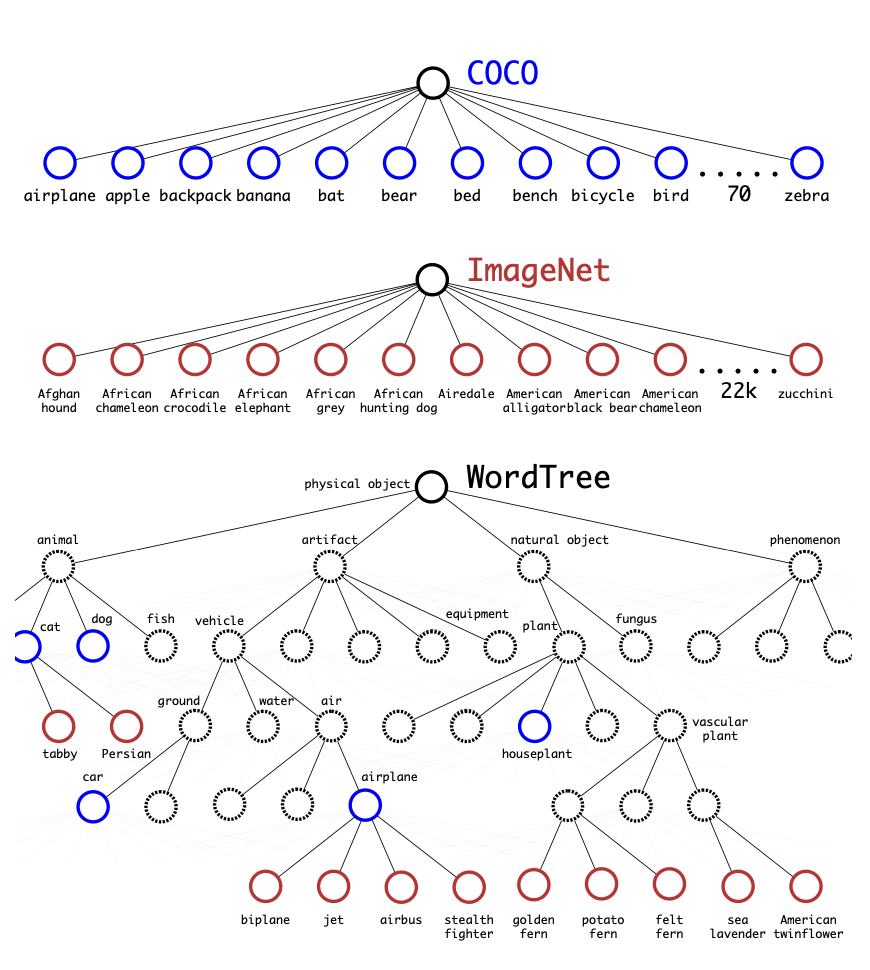